### Histogram of Grayscale Image


Main image:
<br>
<div style="text-align: left;">
    <img src="test.jpg" alt="Drawing" style="height: 200px;">
</div>

[ 72  71  70 ... 128 128 128]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    7   18  240 1184 2053 1895 1355 1241 1175 1169 1100
 1112 1103 1137 1104 1062 1022  992  910  844  764  745  632  581  554
  550  482  437  387  389  363  392  355  352  369  309  329  340  340
  356  372  364  419  445  419  414  422  461  531  524  487  505  518
  549  621  636  659  655  692  689  752  751  820  827  793  793  845
  858  850  930  881  969  965  936 1065 1180 1321 1401 1367 1401 1465
 1432 1696 1887 1868 2037 2137 2330 2650 3503 3056 2958 2881 2861 3206
 3208 2961 2469 2324 2363 2378 2533 2769 2660 2668 2707 2808 2830 2587
 2796 2925 2917 2738 2650 2439 2564 2369 2347 2475 2637 2040 1786 1434
 1286 1119 1113 1073 1127 1577 1306 1101 1201 1181  882  790  790  743
  755  857  874  583  511  447  485  481  552  510  534  536  567  515
  497  517  529  502  514  468  457  447  436  462  451  431  384  433
  395  354  328  313  308  261  210  210  143  

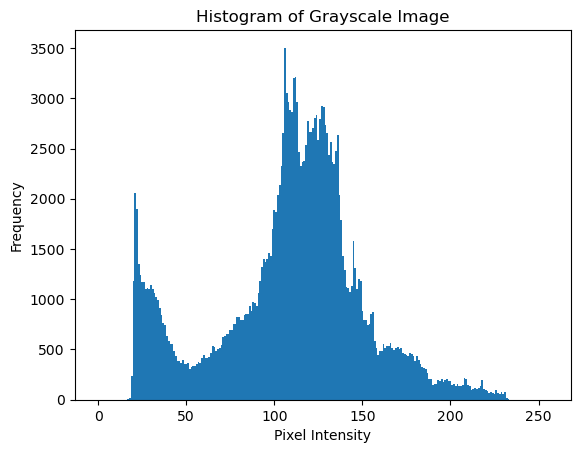

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
I = cv2.imread('test.jpg')

# Convert the image to grayscale
I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Get the histogram using numpy
histogram, bins = np.histogram(I_gray.flatten(), bins=256, range=[0, 256])

# Print the flattened image and its histogram
print(I_gray.flatten())
print(histogram)

# Count occurrences of pixel intensities
di = {}
for i in I_gray.flatten():
    if i in di:
        di[i] += 1
    else:
        di[i] = 1

# Print the dictionary
print(di)

# Plot the histogram
plt.figure()
plt.bar(bins[:-1], histogram, width=1)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


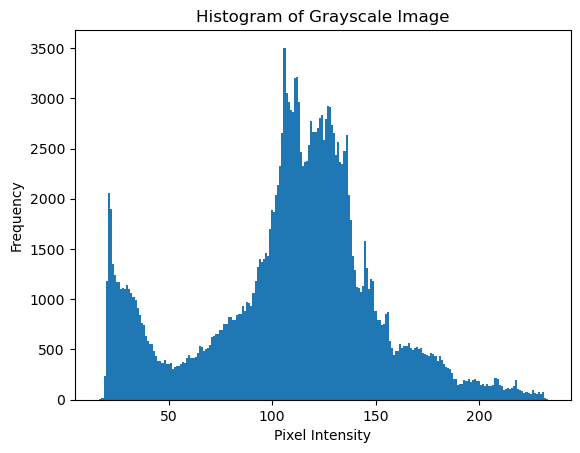

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

I = cv2.imread('test.jpg')

I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

rows, cols = I_gray.shape

di = {}

for row in range(rows):
    for col in range(cols):
        pixel_intensity = I_gray[row, col]
        if pixel_intensity in di:
            di[pixel_intensity] += 1
        else:
            di[pixel_intensity] = 1

histogram = list(di.values())
bins = list(di.keys())

plt.figure()
plt.bar(bins, histogram, width=1)
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


### Bit map slicing

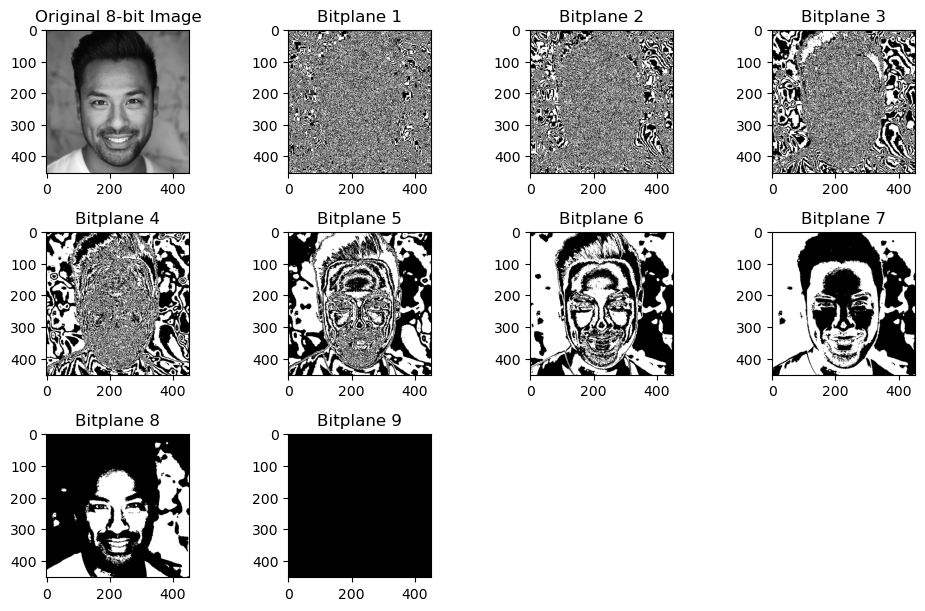

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
I = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Get individual bitplanes
G1 = np.uint8(np.bitwise_and(I, 2**0))
G2 = np.uint8(np.bitwise_and(I, 2**1))
G3 = np.uint8(np.bitwise_and(I, 2**2))
G4 = np.uint8(np.bitwise_and(I, 2**3))
G5 = np.uint8(np.bitwise_and(I, 2**4))
G6 = np.uint8(np.bitwise_and(I, 2**5))
G7 = np.uint8(np.bitwise_and(I, 2**6))
G8 = np.uint8(np.bitwise_and(I, 2**7))
G9 = np.uint8(np.bitwise_and(I, 2**8))

# Plot the images
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(4, 4, 1)
plt.imshow(I, cmap='gray')
plt.title('Original 8-bit Image')

# Bitplanes
for i, bitplane in enumerate([G1, G2, G3, G4, G5, G6, G7, G8,G9], start=2):
    plt.subplot(4, 4, i)
    plt.imshow(bitplane, cmap='gray')
    plt.title(f'Bitplane {i-1}')

plt.tight_layout()
plt.show()


### Filtering Image

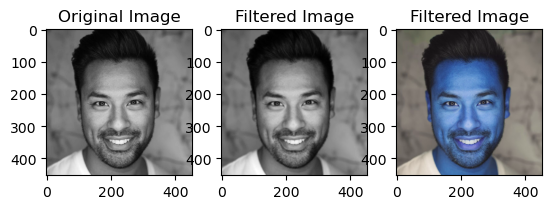

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image_path = 'test.jpg'
I = cv2.imread(image_path)

# Convert image to grayscale
I1 = I
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Define the filter kernel
h = np.ones((3, 3), dtype=np.float32) / 9.0

# Perform image filtering
I2 = cv2.filter2D(I, -1, h)

# Display the original and filtered images
plt.subplot(131), plt.imshow(I, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(I2, cmap='gray'), plt.title('Filtered Image')
plt.subplot(133), plt.imshow(I1, cmap='gray'), plt.title('Filtered Image')
plt.show()


### Negative Image

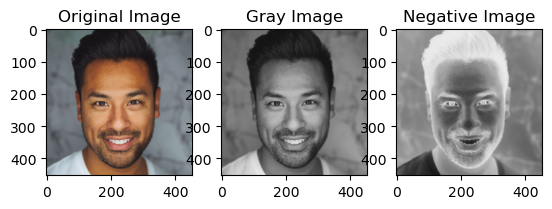

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'test.jpg'
original_image01 = cv2.imread(image_path)
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the negative image
negative_image = 255 - original_image

# Display the original and negative images using matplotlib
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image01, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Gray Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Negative Image')

plt.show()


### Image segmentation

(453, 453, 3)


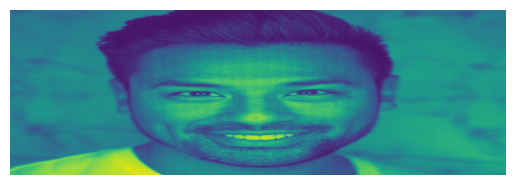

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
I = cv2.imread('test.jpg')

# Get the dimensions of the image
height, width, planes = I.shape
print(I.shape)
# Reshape the image to a 2D array for visualization
rgb = np.reshape(I, (height, width * planes))

# Display the reshaped image
plt.imshow(rgb)
plt.axis('off')  # Turn off axis labels
plt.show()


### Logo trans

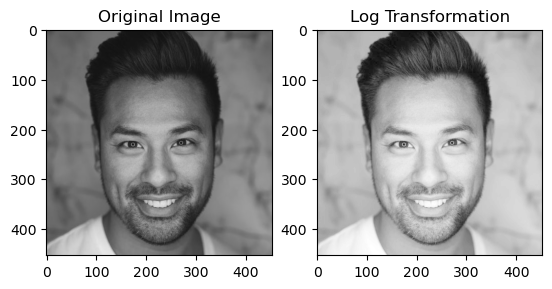

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
I = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert datatype to Double
# (for allowing fractional values)
r = I.astype(np.float64)

# Constant determining the
# nature of the log curve
C = 1

# Performing log transformation
S = C * np.log1p(r)  # np.log1p(x) calculates log(1 + x) for each element of x
T = 255 / (C * np.log(1 + 255))

# Scaling the result to the range [0, 255]
B = (T * S).clip(0, 255).astype(np.uint8)

# Display the original and transformed images
plt.figure()
plt.subplot(121), plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(B, cmap='gray'), plt.title('Log Transformation')
plt.show()


### Min-Max

In [7]:
import cv2
import numpy as np

# Read the image
image_path = 'test.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the size of the image
rows, cols = image.shape

# Initialize variables
min_val = float(image[0, 0])
max_val = float(image[0, 0])
sum_vals = float(image[0, 0])

# Iterate through each pixel
for i in range(rows):
    for j in range(cols):
        pixel_value = float(image[i, j])

        # Update min and max values
        min_val = min(min_val, pixel_value)
        max_val = max(max_val, pixel_value)

        # Accumulate values for average calculation
        sum_vals += pixel_value

# Calculate average value
avg_val = sum_vals / (rows * cols)

# Display the results
print(f'Minimum Value: {min_val}')
print(f'Maximum Value: {max_val}')
print(f'Average Value: {avg_val}')


Minimum Value: 16.0
Maximum Value: 233.0
Average Value: 109.03223055519007


### Edge detection

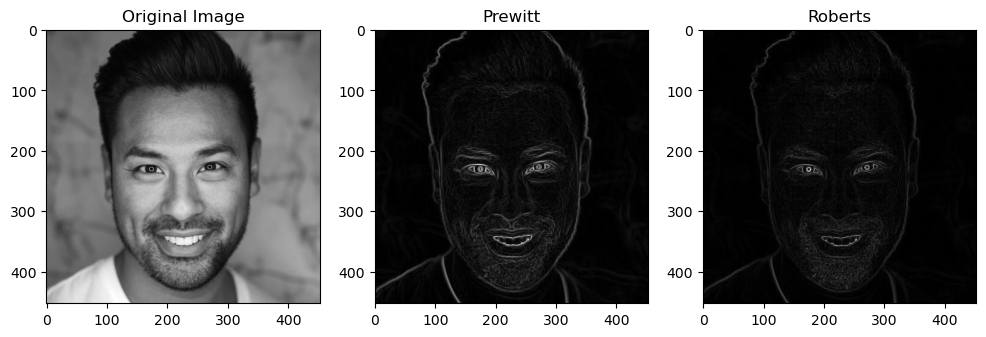

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
I = cv2.imread('test.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Define Prewitt kernel for horizontal and vertical edges
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply Prewitt filter
prEdge_x = cv2.filter2D(I, cv2.CV_64F, kernel_x)
prEdge_y = cv2.filter2D(I, cv2.CV_64F, kernel_y)
prEdge = np.sqrt(prEdge_x**2 + prEdge_y**2)

# Define Roberts kernel for horizontal and vertical edges
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])

# Apply Roberts filter
roEdge_x = cv2.filter2D(I, cv2.CV_64F, kernel_x)
roEdge_y = cv2.filter2D(I, cv2.CV_64F, kernel_y)
roEdge = np.sqrt(roEdge_x**2 + roEdge_y**2)

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(prEdge), cmap='gray')
plt.title('Prewitt')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(roEdge), cmap='gray')
plt.title('Roberts')

plt.show()


### Contraststretching

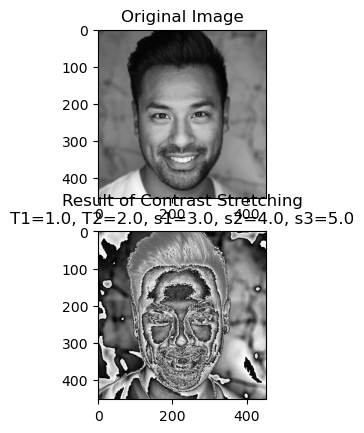

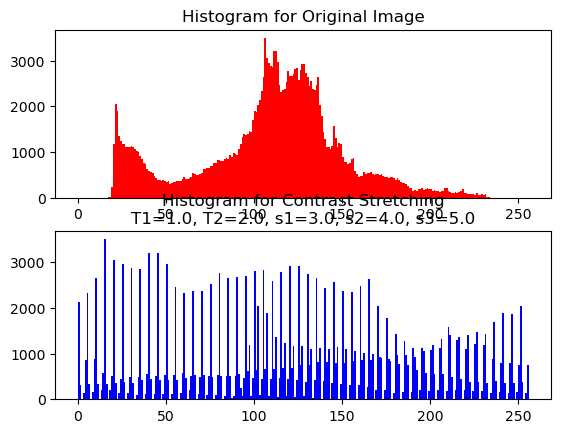

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
I = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Make a copy for the result
G = np.copy(I)

# Get the image dimensions
rows, cols = I.shape

# User input for parameters
T1 = float(input('Enter value of t1 (Threshold 1): '))
T2 = float(input('Enter value of t2 (Threshold 2): '))
s1 = float(input('Enter value of slope 1: '))
s2 = float(input('Enter value of slope 2: '))
s3 = float(input('Enter value of slope 3: '))

# Calculate coefficients
coeffT1 = s1 * T1
coeffT2 = s2 * (T2 - T1) + coeffT1

# Contrast stretching
for i in range(rows):
    for j in range(cols):
        if I[i, j] < T1:
            G[i, j] = np.floor(s1 * I[i, j])
        elif T1 <= I[i, j] < T2:
            G[i, j] = np.floor(s2 * (I[i, j] - T1) + coeffT1)
        elif I[i, j] >= T2:
            G[i, j] = np.floor(s3 * (I[i, j] - T2) + coeffT2)

# Display original and stretched images
plt.figure()
plt.subplot(2, 1, 1), plt.imshow(I, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 1, 2), plt.imshow(G, cmap='gray'), plt.title(
    f"Result of Contrast Stretching\nT1={T1}, T2={T2}, s1={s1}, s2={s2}, s3={s3}")
plt.show()
print()
# Display histograms
plt.figure()
plt.subplot(2, 1, 1), plt.hist(I.flatten(), bins=256, range=[0, 256], color='r'), plt.title('Histogram for Original Image')
plt.subplot(2, 1, 2), plt.hist(G.flatten(), bins=256, range=[0, 256], color='b'), plt.title(
    f"Histogram for Contrast Stretching\nT1={T1}, T2={T2}, s1={s1}, s2={s2}, s3={s3}")
plt.show()


### Bit Plane Slicing

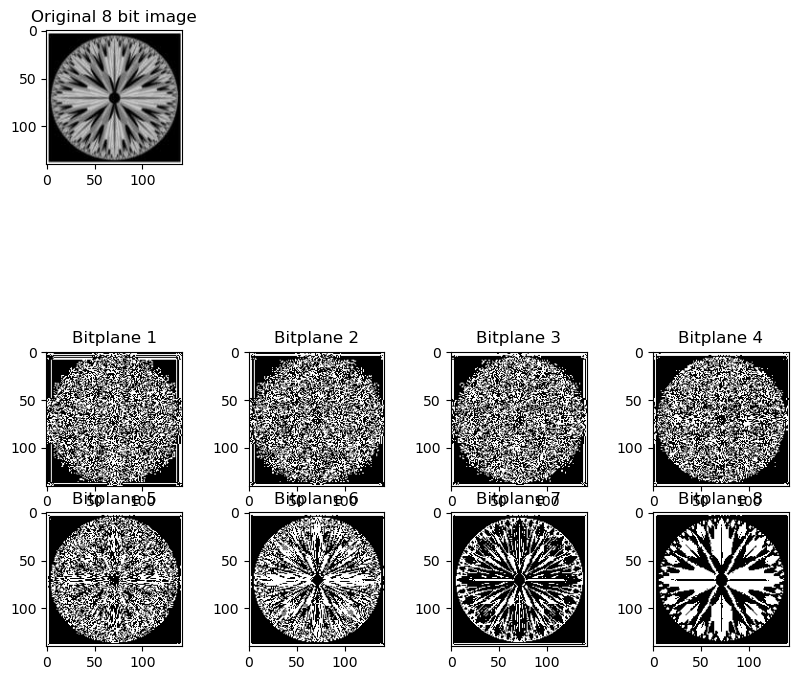

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
I = cv2.imread('../image/bitplane.bmp', cv2.IMREAD_GRAYSCALE)

# Bitplane slicing
G1 = np.uint8((I & 0b00000001) * 255)  # get bitplane 1
G2 = np.uint8((I & 0b00000010) * 255)  # get bitplane 2
G3 = np.uint8((I & 0b00000100) * 255)  # get bitplane 3
G4 = np.uint8((I & 0b00001000) * 255)  # get bitplane 4
G5 = np.uint8((I & 0b00010000) * 255)  # get bitplane 5
G6 = np.uint8((I & 0b00100000) * 255)  # get bitplane 6
G7 = np.uint8((I & 0b01000000) * 255)  # get bitplane 7
G8 = np.uint8((I & 0b10000000) * 255)  # get bitplane 8

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(4, 4, 1)
plt.imshow(I, cmap='gray')
plt.title('Original 8 bit image')

plt.subplot(4, 4, 9)
plt.imshow(G1, cmap='gray')
plt.title('Bitplane 1')

plt.subplot(4, 4, 10)
plt.imshow(G2, cmap='gray')
plt.title('Bitplane 2')

plt.subplot(4, 4, 11)
plt.imshow(G3, cmap='gray')
plt.title('Bitplane 3')

plt.subplot(4, 4, 12)
plt.imshow(G4, cmap='gray')
plt.title('Bitplane 4')

plt.subplot(4, 4, 13)
plt.imshow(G5, cmap='gray')
plt.title('Bitplane 5')

plt.subplot(4, 4, 14)
plt.imshow(G6, cmap='gray')
plt.title('Bitplane 6')

plt.subplot(4, 4, 15)
plt.imshow(G7, cmap='gray')
plt.title('Bitplane 7')

plt.subplot(4, 4, 16)
plt.imshow(G8, cmap='gray')
plt.title('Bitplane 8')

plt.show()


### Add two Image

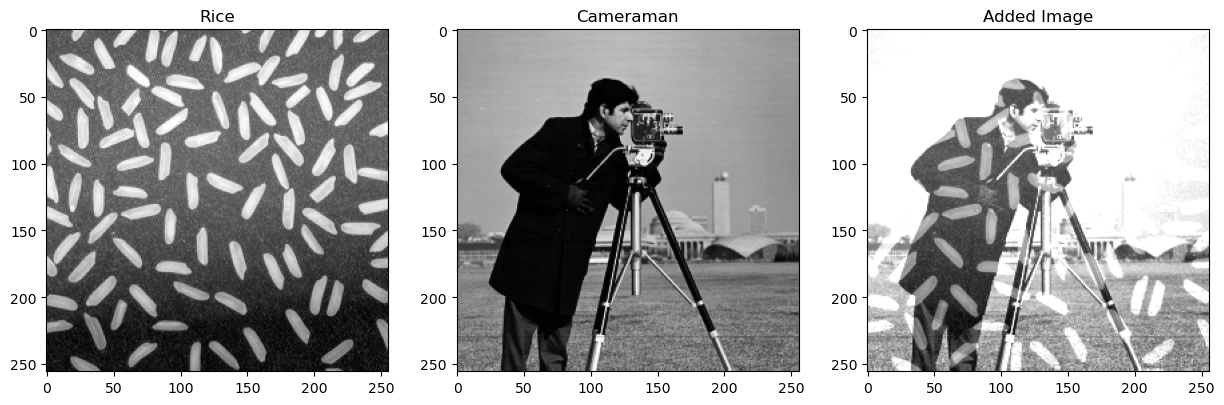

In [11]:
import cv2
import matplotlib.pyplot as plt

# Read the images
I = cv2.imread('../image/rice.png', cv2.IMREAD_GRAYSCALE)
J = cv2.imread('../image/cameraman.tif', cv2.IMREAD_GRAYSCALE)

# Add two images
K = cv2.add(I, J)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Rice')

plt.subplot(1, 3, 2)
plt.imshow(J, cmap='gray')
plt.title('Cameraman')

plt.subplot(1, 3, 3)
plt.imshow(K, cmap='gray')
plt.title('Added Image')

plt.show()
